In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
from scipy import stats
from pathlib import Path

# directory and file paths
data_dir = Path("../data/")
interim_data_dir = data_dir / "interim"
processed_data_dir = data_dir / "processed"

zillow_master = "Zillow_master.csv"
zillow = pd.read_csv(zillow_master)
zillow.head()

,Unnamed: 0,RegionID,RegionName,SizeRank,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,...,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021_y.2
0,0,0,zillow_rents,zillow_rents,zillow_rents,zillow_rents,zillow_rents,zillow_rents,zillow_rents,zillow_rents,...,zillow_sale_counts,zillow_sale_counts,zillow_sale_counts,zillow_sale_counts,zillow_sale_counts,zillow_sale_counts,zillow_sale_counts,zillow_sale_counts,zillow_sale_counts,zillow_sale_counts
1,1,394913,"New York, NY",1,2772.0,2778.0,2784,2790,2796,2802,...,10194,12366,14848,16923,18143,21009,18849,22919,17212.0,13936.0
2,2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,2487.0,2494.0,2501,2508,2515,2522,...,4759,6980,9469,9571,10203,10597,9014,10355,6735.0,7194.0
3,3,394463,"Chicago, IL",3,1734.0,1738.0,1743,1747,1751,1755,...,8430,10669,13767,13946,14351,18268,15653,14767,12737.0,9767.0
4,4,394514,"Dallas-Fort Worth, TX",4,1503.0,1508.0,1512,1517,1521,1526,...,7212,10443,12305,11166,10161,9783,8690,10025,6473.0,6412.0


In [3]:
monthly_covid = pd.read_csv("data/processed/Monthly_COVID-19_Cases_By_MSA.csv")
monthly_covid.head()

,case_month,cbsa_title,cbsa_code,cases,hosp,icu,deaths,cases_per_capita,population
0,2020-01,"Boise City, ID",14260,61,1,0,0,0.000081,749202.0
1,2020-01,"Boston-Cambridge-Newton, MA-NH",14460,56,2,2,0,0.000011,4873019.0
2,2020-01,"Buffalo-Cheektowaga-Niagara Falls, NY",15380,15,1,0,0,0.000013,1127983.0
3,2020-01,"Charleston-North Charleston, SC",16700,12,0,0,0,0.000015,802122.0
4,2020-01,"Chicago-Naperville-Elgin, IL-IN-WI",16980,13,0,0,0,0.000001,9458539.0


In [5]:
rent_melt = pd.melt(zillow, id_vars=['RegionName'], value_vars=['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
                                                          '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
                                                          '2021-01', '2021-02'],  var_name='date', value_name='rent')
rent_melt.head()

,RegionName,date,rent
0,zillow_rents,2020-01,zillow_rents
1,"New York, NY",2020-01,2816
2,"Los Angeles-Long Beach-Anaheim, CA",2020-01,2553
3,"Chicago, IL",2020-01,1772
4,"Dallas-Fort Worth, TX",2020-01,1546


In [6]:
rent_melt = rent_melt.rename(columns={'RegionName': 'cbsa_title', 'date': 'case_month'})
rent_melt.head()

,cbsa_title,case_month,rent
0,zillow_rents,2020-01,zillow_rents
1,"New York, NY",2020-01,2816
2,"Los Angeles-Long Beach-Anaheim, CA",2020-01,2553
3,"Chicago, IL",2020-01,1772
4,"Dallas-Fort Worth, TX",2020-01,1546


In [7]:
monthly_covid = pd.read_csv("data/processed/Monthly_COVID-19_Cases_By_MSA.csv")
monthly_covid.head()

,case_month,cbsa_title,cbsa_code,cases,hosp,icu,deaths,cases_per_capita,population
0,2020-01,"Boise City, ID",14260,61,1,0,0,0.000081,749202.0
1,2020-01,"Boston-Cambridge-Newton, MA-NH",14460,56,2,2,0,0.000011,4873019.0
2,2020-01,"Buffalo-Cheektowaga-Niagara Falls, NY",15380,15,1,0,0,0.000013,1127983.0
3,2020-01,"Charleston-North Charleston, SC",16700,12,0,0,0,0.000015,802122.0
4,2020-01,"Chicago-Naperville-Elgin, IL-IN-WI",16980,13,0,0,0,0.000001,9458539.0


In [26]:
MSA_rent_case_count = pd.merge(monthly_covid, rent_melt)
MSA_rent_case_count.head()

,case_month,cbsa_title,cbsa_code,cases,hosp,icu,deaths,cases_per_capita,population,rent
0,2020-01,"Boise City, ID",14260,61,1,0,0,0.000081,749202.0,1298
1,2020-01,"Columbus, OH",18140,11,0,0,0,0.000005,2122271.0,1269
2,2020-01,"Knoxville, TN",28940,16,6,0,0,0.000018,869046.0,1296
3,2020-01,"Los Angeles-Long Beach-Anaheim, CA",31080,292,12,3,0,0.000022,13214799.0,2553
4,2020-01,"Salt Lake City, UT",41620,11,0,0,0,0.000009,1232696.0,1405


In [39]:
MSA_rent_case_count['rent'] = MSA_rent_case_count['rent'].astype(str).astype(int)

In [40]:
MSA_rent_case_count['log_rent'] = np.log(MSA_rent_case_count['rent'])
MSA_rent_case_count['deaths_per_capita'] = MSA_rent_case_count['deaths']/MSA_rent_case_count['population']
MSA_rent_case_count['hosp_per_capita'] = MSA_rent_case_count['hosp']/MSA_rent_case_count['population']
MSA_rent_case_count['icu_per_capita'] = MSA_rent_case_count['icu']/MSA_rent_case_count['population']

MSA_rent_case_count

,case_month,cbsa_title,cbsa_code,cases,hosp,icu,deaths,cases_per_capita,population,rent,deaths_per_capita,hosp_per_capita,icu_per_capita,log_rent
0,2020-01,"Boise City, ID",14260,61,1,0,0,0.000081,749202.0,1298,0.00000,1.334754e-06,0.000000e+00,7.168580
1,2020-01,"Columbus, OH",18140,11,0,0,0,0.000005,2122271.0,1269,0.00000,0.000000e+00,0.000000e+00,7.145984
2,2020-01,"Knoxville, TN",28940,16,6,0,0,0.000018,869046.0,1296,0.00000,6.904122e-06,0.000000e+00,7.167038
3,2020-01,"Los Angeles-Long Beach-Anaheim, CA",31080,292,12,3,0,0.000022,13214799.0,2553,0.00000,9.080728e-07,2.270182e-07,7.845024
4,2020-01,"Salt Lake City, UT",41620,11,0,0,0,0.000009,1232696.0,1405,0.00000,0.000000e+00,0.000000e+00,7.247793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2021-02,"Tucson, AZ",46060,5934,339,0,52,0.005666,1047279.0,1335,0.00005,3.236960e-04,0.000000e+00,7.196687
371,2021-02,"Tulsa, OK",46140,6921,463,0,0,0.006931,998626.0,1172,0.00000,4.636370e-04,0.000000e+00,7.066467
372,2021-02,"Urban Honolulu, HI",46520,1275,0,0,0,0.001308,974563.0,2168,0.00000,0.000000e+00,0.000000e+00,7.681560
373,2021-02,"Wichita, KS",48620,3406,180,0,0,0.005320,640218.0,856,0.00000,2.811542e-04,0.000000e+00,6.752270


<AxesSubplot:xlabel='rent', ylabel='Count'>

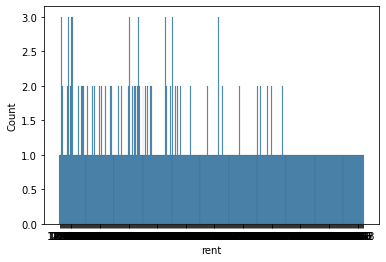

In [33]:
sns.histplot(data=MSA_rent_case_count, x="rent", binwidth = 30)

In [34]:
MSA_rent_case_count.rent.dtype

dtype('O')

In [36]:
MSA_rent_case_count['rent'] = MSA_rent_case_count['rent'].astype(str).astype(int)

In [37]:
MSA_rent_case_count.rent.dtype

dtype('int64')

<AxesSubplot:xlabel='rent', ylabel='Count'>

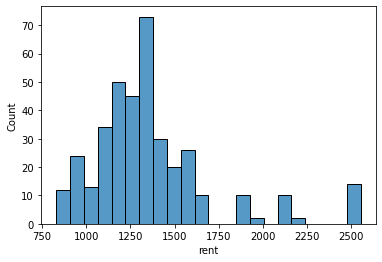

In [38]:
sns.histplot(data=MSA_rent_case_count, x="rent")

<AxesSubplot:xlabel='log_rent', ylabel='Count'>

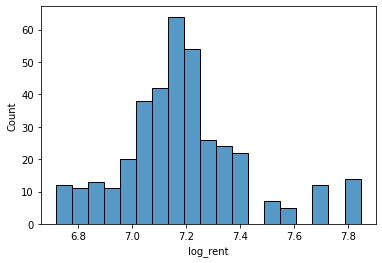

In [41]:
sns.histplot(data=MSA_rent_case_count, x="log_rent")

In [54]:
import statsmodels.api as sm

MSA_rent_case_count = MSA_rent_case_count[MSA_rent_case_count['rent'].notna()]
MSA_rent_case_count = MSA_rent_case_count[MSA_rent_case_count['cases_per_capita'].notna()]


x = MSA_rent_case_count['cases_per_capita']
y = MSA_rent_case_count['rent']

x = sm.add_constant(x)

mod = sm.OLS(y, x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.006463
Date:                Sun, 25 Apr 2021   Prob (F-statistic):              0.936
Time:                        23:49:45   Log-Likelihood:                -2636.0
No. Observations:                 362   AIC:                             5276.
Df Residuals:                     360   BIC:                             5284.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1374.4078     24.304  

In [53]:
import statsmodels.api as sm

x = MSA_rent_case_count['icu_per_capita']
y = MSA_rent_case_count['rent']

x = sm.add_constant(x)

mod = sm.OLS(y, x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.234
Date:                Sun, 25 Apr 2021   Prob (F-statistic):              0.267
Time:                        23:49:23   Log-Likelihood:                -2635.4
No. Observations:                 362   AIC:                             5275.
Df Residuals:                     360   BIC:                             5283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1364.3734     21.117     64.

In [51]:
import statsmodels.api as sm

x = MSA_rent_case_count['hosp_per_capita']
y = MSA_rent_case_count['rent']

x = sm.add_constant(x)

mod = sm.OLS(y, x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3793
Date:                Sun, 25 Apr 2021   Prob (F-statistic):              0.538
Time:                        23:48:53   Log-Likelihood:                -2635.8
No. Observations:                 362   AIC:                             5276.
Df Residuals:                     360   BIC:                             5283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1384.8929     23.823     

In [50]:
import statsmodels.api as sm

x = MSA_rent_case_count['deaths_per_capita']
y = MSA_rent_case_count['rent']

x = sm.add_constant(x)

mod = sm.OLS(y, x)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.265
Date:                Sun, 25 Apr 2021   Prob (F-statistic):             0.0396
Time:                        23:48:27   Log-Likelihood:                -2633.9
No. Observations:                 362   AIC:                             5272.
Df Residuals:                     360   BIC:                             5280.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1357.1431     20.49

In [49]:
X = MSA_rent_case_count[['cases_per_capita', 
                             'deaths_per_capita', 
                             'icu_per_capita', 
                             'hosp_per_capita']] 
y = MSA_rent_case_count['rent']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     4.288
Date:                Sun, 25 Apr 2021   Prob (F-statistic):            0.00211
Time:                        23:47:45   Log-Likelihood:                -2627.5
No. Observations:                 362   AIC:                             5265.
Df Residuals:                     357   BIC:                             5285.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1389.3647     24.59